# Keras: Logistic Regression Vs Neural Network

This is a simple exercise that compares Logistic Regression with a Neural Network.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

## Binary Classification 

## Create Data

In [2]:
num_points = 500

In [3]:
noise = .2

### Class 1 

In [4]:
data1 = np.linspace(-1, 3.5, num_points) + np.random.normal(0, noise, num_points)
data2 = np.sin(np.linspace(-1, 3.5, num_points)) + np.random.normal(0, noise, num_points)

In [5]:
data = pd.DataFrame([data1,data2]).T

In [6]:
data['class'] = 0

### Class 2

In [7]:
data3 = np.linspace(3, 7, num_points) + np.random.normal(0, noise, num_points) - 1.5
data4 = np.sin(np.linspace(3, 7, num_points)) + np.random.normal(0, noise, num_points) -0

In [8]:
data2 = pd.DataFrame([data3,data4]).T

In [9]:
data2['class'] = 1

### Combine Data

In [10]:
data = data.append(data2)

In [11]:
data.columns = ['A','B','class']

### Scale

In [12]:
data['A'] = data['A']/6 

### Plot Data

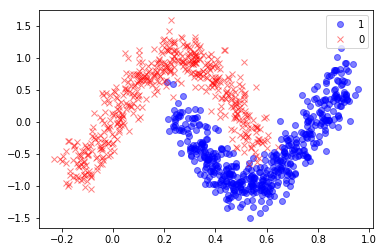

In [13]:
plt.plot(data.loc[data['class'] == 1,'A'],data.loc[data['class'] == 1,'B'], 'ob', alpha = .5)
plt.plot(data.loc[data['class'] == 0,'A'],data.loc[data['class'] == 0,'B'], 'xr', alpha = .5)
plt.legend(['1', '0','2'])

### Split Data 

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['class'],axis = 1), 
                                                    data['class'], 
                                                    test_size=0.2)

### Logistic Regression

A neural network with only a single node which has a sigmoid for its activation function is a Logistic Regression.

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [17]:
model = Sequential()

In [18]:
model.add(Dense(1,input_shape=(2,), activation='sigmoid'))

In [19]:
model.compile(Adam(lr=0.05),loss = 'binary_crossentropy',metrics = ['accuracy'])

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(X_train.values,y_train.values,epochs = 200)

Epoch 1/200
800/800 [==============================] - 1s 1ms/step - loss: 0.4738 - acc: 0.7937
Epoch 2/200
800/800 [==============================] - 0s 88us/step - loss: 0.3862 - acc: 0.8212
Epoch 3/200
800/800 [==============================] - 0s 91us/step - loss: 0.3406 - acc: 0.8550
Epoch 4/200
800/800 [==============================] - 0s 87us/step - loss: 0.3109 - acc: 0.8738
Epoch 5/200
800/800 [==============================] - 0s 91us/step - loss: 0.2933 - acc: 0.8925
Epoch 6/200
800/800 [==============================] - 0s 89us/step - loss: 0.2815 - acc: 0.8912
Epoch 7/200
800/800 [==============================] - 0s 86us/step - loss: 0.2749 - acc: 0.8950
Epoch 8/200
800/800 [==============================] - 0s 86us/step - loss: 0.2707 - acc: 0.8888
Epoch 9/200
800/800 [==============================] - 0s 79us/step - loss: 0.2655 - acc: 0.8962
Epoch 10/200
800/800 [==============================] - 0s 86us/step - loss: 0.2625 - acc: 0.8925
Epoch 11/200
800/800 [========

800/800 [==============================] - 0s 83us/step - loss: 0.2550 - acc: 0.8950
Epoch 85/200
800/800 [==============================] - 0s 85us/step - loss: 0.2543 - acc: 0.8950
Epoch 86/200
800/800 [==============================] - 0s 76us/step - loss: 0.2545 - acc: 0.8938
Epoch 87/200
800/800 [==============================] - 0s 75us/step - loss: 0.2546 - acc: 0.8938
Epoch 88/200
800/800 [==============================] - 0s 79us/step - loss: 0.2543 - acc: 0.8950
Epoch 89/200
800/800 [==============================] - 0s 75us/step - loss: 0.2561 - acc: 0.8938
Epoch 90/200
800/800 [==============================] - 0s 79us/step - loss: 0.2546 - acc: 0.8925
Epoch 91/200
800/800 [==============================] - 0s 73us/step - loss: 0.2564 - acc: 0.8925
Epoch 92/200
800/800 [==============================] - 0s 79us/step - loss: 0.2568 - acc: 0.8938
Epoch 93/200
800/800 [==============================] - 0s 77us/step - loss: 0.2562 - acc: 0.8888
Epoch 94/200
800/800 [===========

800/800 [==============================] - 0s 80us/step - loss: 0.2549 - acc: 0.8912
Epoch 167/200
800/800 [==============================] - 0s 83us/step - loss: 0.2547 - acc: 0.8925
Epoch 168/200
800/800 [==============================] - 0s 86us/step - loss: 0.2543 - acc: 0.8950
Epoch 169/200
800/800 [==============================] - 0s 80us/step - loss: 0.2548 - acc: 0.8938
Epoch 170/200
800/800 [==============================] - 0s 78us/step - loss: 0.2547 - acc: 0.8962
Epoch 171/200
800/800 [==============================] - 0s 76us/step - loss: 0.2560 - acc: 0.8950
Epoch 172/200
800/800 [==============================] - 0s 83us/step - loss: 0.2545 - acc: 0.8938
Epoch 173/200
800/800 [==============================] - 0s 79us/step - loss: 0.2545 - acc: 0.8938
Epoch 174/200
800/800 [==============================] - 0s 82us/step - loss: 0.2547 - acc: 0.8938
Epoch 175/200
800/800 [==============================] - 0s 81us/step - loss: 0.2551 - acc: 0.8938
Epoch 176/200
800/800 [=

In [22]:
model.evaluate(X_test.values,y_test.values)

200/200 [==============================] - 0s 95us/step


[0.25944637537002563, 0.89000000000000001]

In [23]:
model_train_pred = model.predict(X_train.values)
model_test_pred = model.predict(X_test.values)

In [24]:
model_train_class = np.round(model_train_pred)
model_test_class = np.round(model_test_pred)

### Accuracy

In [25]:
def train_test_accuracy(y_train, y_test, train_pred, test_pred):
    from sklearn.metrics import classification_report
    from sklearn.metrics import accuracy_score
    print("Train Accuracy: " + str(accuracy_score(y_train,train_pred)))
    print("Test Accuracy: " + str(accuracy_score(y_test,test_pred) ))
    print("\n Classification Report:(test set)")
    print(classification_report(y_train,train_pred))
    return

In [26]:
train_test_accuracy(y_train, y_test, model_train_class, model_test_class)

Train Accuracy: 0.895
Test Accuracy: 0.89

 Classification Report:(test set)
             precision    recall  f1-score   support

          0       0.90      0.88      0.89       388
          1       0.89      0.91      0.90       412

avg / total       0.90      0.90      0.89       800



In [27]:
def plot_decision_boundary(model, X, y):
    amin = X.min(axis=0) - 0.1
    amax = X.max(axis=0) + 0.1
    bmin = y.min(axis=0) - 0.1
    bmax = y.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(data.loc[data['class'] == 0,'A'], data.loc[data['class'] == 0,'B'], 'ob', alpha=0.5)
    plt.plot(data.loc[data['class'] == 1,'A'], data.loc[data['class'] == 1,'B'], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
    return 


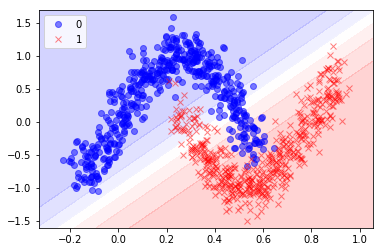

In [28]:
plot_decision_boundary(model, data['A'].values, data['B'].values)

### Neural Network

In [29]:
deep_model = Sequential()

In [30]:
deep_model.add(Dense(units = 10, input_shape =(2,) ,activation='relu'))
deep_model.add(Dense(units = 10, activation='relu'))
deep_model.add(Dense(units = 1, activation='sigmoid'))

In [31]:
deep_model.compile(Adam(lr = 0.1), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [32]:
deep_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [33]:
deep_model.fit(X_train.values,y_train.values,epochs = 100)

Epoch 1/100
800/800 [==============================] - 0s 407us/step - loss: 0.3392 - acc: 0.8525
Epoch 2/100
800/800 [==============================] - 0s 111us/step - loss: 0.2854 - acc: 0.8837
Epoch 3/100
800/800 [==============================] - 0s 108us/step - loss: 0.2731 - acc: 0.8825
Epoch 4/100
800/800 [==============================] - 0s 108us/step - loss: 0.2692 - acc: 0.8850
Epoch 5/100
800/800 [==============================] - 0s 102us/step - loss: 0.2312 - acc: 0.8862
Epoch 6/100
800/800 [==============================] - 0s 106us/step - loss: 0.1958 - acc: 0.9025
Epoch 7/100
800/800 [==============================] - 0s 101us/step - loss: 0.1750 - acc: 0.9138
Epoch 8/100
800/800 [==============================] - 0s 105us/step - loss: 0.1656 - acc: 0.9150
Epoch 9/100
800/800 [==============================] - 0s 108us/step - loss: 0.1876 - acc: 0.9312
Epoch 10/100
800/800 [==============================] - 0s 103us/step - loss: 0.1411 - acc: 0.9400
Epoch 11/100
800/80

800/800 [==============================] - 0s 102us/step - loss: 0.0323 - acc: 0.9913
Epoch 85/100
800/800 [==============================] - 0s 100us/step - loss: 0.0203 - acc: 0.9937
Epoch 86/100
800/800 [==============================] - 0s 97us/step - loss: 0.0361 - acc: 0.9888
Epoch 87/100
800/800 [==============================] - 0s 94us/step - loss: 0.0299 - acc: 0.9862
Epoch 88/100
800/800 [==============================] - 0s 102us/step - loss: 0.0430 - acc: 0.9838
Epoch 89/100
800/800 [==============================] - 0s 101us/step - loss: 0.0553 - acc: 0.9838
Epoch 90/100
800/800 [==============================] - 0s 107us/step - loss: 0.0362 - acc: 0.9888
Epoch 91/100
800/800 [==============================] - 0s 100us/step - loss: 0.0466 - acc: 0.9812
Epoch 92/100
800/800 [==============================] - 0s 99us/step - loss: 0.0657 - acc: 0.9850
Epoch 93/100
800/800 [==============================] - 0s 93us/step - loss: 0.0413 - acc: 0.9888
Epoch 94/100
800/800 [=====

In [34]:
deep_model_train_pred = deep_model.predict(X_train.values)
deep_model_test_pred = deep_model.predict(X_test.values)

In [35]:
deep_model_train_class = np.round(deep_model_train_pred)
deep_model_test_class = np.round(deep_model_test_pred)

### Accuracy

In [36]:
train_test_accuracy(y_train, y_test, deep_model_train_class, deep_model_test_class)

Train Accuracy: 0.9775
Test Accuracy: 0.985

 Classification Report:(test set)
             precision    recall  f1-score   support

          0       0.97      0.98      0.98       388
          1       0.99      0.97      0.98       412

avg / total       0.98      0.98      0.98       800



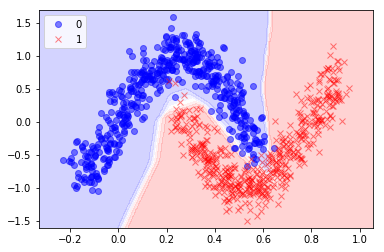

In [37]:
plot_decision_boundary(deep_model, data['A'].values, data['B'].values)

# Multiway 

## Create Data

In [38]:
data5 = np.linspace(-1, 3.5, num_points) + np.random.normal(0, noise, num_points) 
data6 = np.sin(np.linspace(-1, 3.5, num_points)) + np.random.normal(0, noise, num_points) + 1 

### Scale

In [39]:
data5 = data5/6

In [40]:
data3 = pd.DataFrame([data5,data6]).T

In [41]:
data3['class'] = 2

In [42]:
data3.columns = ['A','B','class']

In [43]:
data = data.append(data3)

## Plot Data

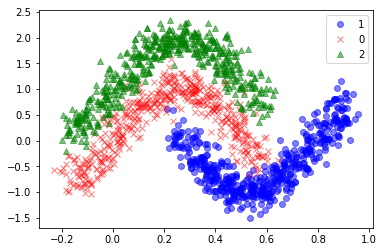

In [44]:
plt.plot(data.loc[data['class'] == 1,'A'],data.loc[data['class'] == 1,'B'], 'ob', alpha = .5)
plt.plot(data.loc[data['class'] == 0,'A'],data.loc[data['class'] == 0,'B'], 'xr', alpha = .5)
plt.plot(data.loc[data['class'] == 2,'A'],data.loc[data['class'] == 2,'B'], '^g', alpha = .5)

plt.legend(['1', '0','2'])

### Split Data

In [45]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['class'],axis = 1), 
                                                    data['class'], 
                                                    test_size=0.2)

In [46]:
y_train_softmax = to_categorical(y_train, num_classes=None)

In [47]:
y_test_softmax = to_categorical(y_test, num_classes=None)

### Softmax Regression

In [48]:
model_softmax = Sequential()

In [49]:
model_softmax.add(Dense(3, input_shape =(2,) ,activation='softmax'))

In [50]:
model_softmax.compile(Adam(lr=0.05),loss = 'categorical_crossentropy',
                      metrics = ['accuracy'])

In [51]:
model_softmax.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 3)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [52]:
model_softmax.fit(X_train.values,y_train_softmax,epochs = 200)

Epoch 1/200
1200/1200 [==============================] - 0s 295us/step - loss: 0.9825 - acc: 0.4850
Epoch 2/200
1200/1200 [==============================] - 0s 90us/step - loss: 0.5838 - acc: 0.7475
Epoch 3/200
1200/1200 [==============================] - 0s 82us/step - loss: 0.5186 - acc: 0.7625
Epoch 4/200
1200/1200 [==============================] - 0s 84us/step - loss: 0.4902 - acc: 0.7767
Epoch 5/200
1200/1200 [==============================] - 0s 84us/step - loss: 0.4756 - acc: 0.7717
Epoch 6/200
1200/1200 [==============================] - 0s 79us/step - loss: 0.4641 - acc: 0.7717
Epoch 7/200
1200/1200 [==============================] - 0s 78us/step - loss: 0.4617 - acc: 0.7808
Epoch 8/200
1200/1200 [==============================] - 0s 77us/step - loss: 0.4578 - acc: 0.7800
Epoch 9/200
1200/1200 [==============================] - 0s 80us/step - loss: 0.4498 - acc: 0.7833
Epoch 10/200
1200/1200 [==============================] - 0s 78us/step - loss: 0.4474 - acc: 0.7825
Epoch 11

1200/1200 [==============================] - 0s 79us/step - loss: 0.4449 - acc: 0.7967
Epoch 84/200
1200/1200 [==============================] - 0s 76us/step - loss: 0.4456 - acc: 0.7892
Epoch 85/200
1200/1200 [==============================] - 0s 76us/step - loss: 0.4448 - acc: 0.7925
Epoch 86/200
1200/1200 [==============================] - 0s 76us/step - loss: 0.4471 - acc: 0.7917
Epoch 87/200
1200/1200 [==============================] - 0s 75us/step - loss: 0.4439 - acc: 0.7817
Epoch 88/200
1200/1200 [==============================] - 0s 81us/step - loss: 0.4438 - acc: 0.7900
Epoch 89/200
1200/1200 [==============================] - 0s 81us/step - loss: 0.4447 - acc: 0.7867
Epoch 90/200
1200/1200 [==============================] - 0s 74us/step - loss: 0.4438 - acc: 0.7933
Epoch 91/200
1200/1200 [==============================] - 0s 79us/step - loss: 0.4443 - acc: 0.7908
Epoch 92/200
1200/1200 [==============================] - 0s 80us/step - loss: 0.4436 - acc: 0.7842
Epoch 93/200


1200/1200 [==============================] - 0s 76us/step - loss: 0.4497 - acc: 0.7825
Epoch 165/200
1200/1200 [==============================] - 0s 80us/step - loss: 0.4418 - acc: 0.7892
Epoch 166/200
1200/1200 [==============================] - 0s 74us/step - loss: 0.4469 - acc: 0.7900
Epoch 167/200
1200/1200 [==============================] - 0s 76us/step - loss: 0.4493 - acc: 0.7942
Epoch 168/200
1200/1200 [==============================] - 0s 78us/step - loss: 0.4455 - acc: 0.7917
Epoch 169/200
1200/1200 [==============================] - 0s 75us/step - loss: 0.4423 - acc: 0.7958
Epoch 170/200
1200/1200 [==============================] - 0s 74us/step - loss: 0.4435 - acc: 0.7908
Epoch 171/200
1200/1200 [==============================] - 0s 82us/step - loss: 0.4449 - acc: 0.7892
Epoch 172/200
1200/1200 [==============================] - 0s 77us/step - loss: 0.4540 - acc: 0.7950
Epoch 173/200
1200/1200 [==============================] - 0s 77us/step - loss: 0.4458 - acc: 0.7842
Epoc

In [53]:
model_softmax.evaluate(X_test.values,y_test_softmax)

300/300 [==============================] - 0s 140us/step


[0.44432417591412859, 0.78000000079472864]

In [54]:
model_softmax_train_pred = model_softmax.predict(X_train.values)
model_softmax_test_pred = model_softmax.predict(X_test.values)

In [55]:
model_softmax_train_class = np.argmax(model_softmax_train_pred,axis = 1)
model_softmax_test_class = np.argmax(model_softmax_test_pred,axis = 1)

### Accuracy

In [56]:
train_test_accuracy(y_train, y_test, model_softmax_train_class, model_softmax_test_class)

Train Accuracy: 0.794166666667
Test Accuracy: 0.78

 Classification Report:(test set)
             precision    recall  f1-score   support

          0       0.68      0.69      0.68       390
          1       0.88      0.91      0.89       413
          2       0.81      0.78      0.80       397

avg / total       0.79      0.79      0.79      1200



### Deep Learning

In [57]:
deep_model_softmax = Sequential()

In [58]:
deep_model_softmax.add(Dense(units = 10,input_shape=(2,), activation='relu'))
deep_model_softmax.add(Dense(units = 10, activation='relu'))
deep_model_softmax.add(Dense(units = 3, activation='softmax'))

In [59]:
deep_model_softmax.compile(Adam(lr=0.05),loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [60]:
deep_model_softmax.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 33        
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________


In [61]:
deep_model_softmax.fit(X_train.values,y_train_softmax,epochs = 200)

Epoch 1/200
1200/1200 [==============================] - 0s 324us/step - loss: 0.5992 - acc: 0.7417
Epoch 2/200
1200/1200 [==============================] - 0s 110us/step - loss: 0.3871 - acc: 0.8425
Epoch 3/200
1200/1200 [==============================] - 0s 107us/step - loss: 0.2891 - acc: 0.8875
Epoch 4/200
1200/1200 [==============================] - 0s 104us/step - loss: 0.2350 - acc: 0.8900
Epoch 5/200
1200/1200 [==============================] - 0s 105us/step - loss: 0.2155 - acc: 0.9050
Epoch 6/200
1200/1200 [==============================] - 0s 114us/step - loss: 0.1949 - acc: 0.9100
Epoch 7/200
1200/1200 [==============================] - 0s 102us/step - loss: 0.2032 - acc: 0.9208
Epoch 8/200
1200/1200 [==============================] - 0s 105us/step - loss: 0.1807 - acc: 0.9200
Epoch 9/200
1200/1200 [==============================] - 0s 103us/step - loss: 0.1392 - acc: 0.9458
Epoch 10/200
1200/1200 [==============================] - 0s 106us/step - loss: 0.1343 - acc: 0.9492

1200/1200 [==============================] - 0s 94us/step - loss: 0.0815 - acc: 0.9708
Epoch 83/200
1200/1200 [==============================] - 0s 99us/step - loss: 0.0876 - acc: 0.9658
Epoch 84/200
1200/1200 [==============================] - 0s 97us/step - loss: 0.0926 - acc: 0.9633
Epoch 85/200
1200/1200 [==============================] - 0s 96us/step - loss: 0.0895 - acc: 0.9625
Epoch 86/200
1200/1200 [==============================] - 0s 101us/step - loss: 0.1253 - acc: 0.9542
Epoch 87/200
1200/1200 [==============================] - 0s 94us/step - loss: 0.0891 - acc: 0.9608
Epoch 88/200
1200/1200 [==============================] - 0s 92us/step - loss: 0.0646 - acc: 0.9783
Epoch 89/200
1200/1200 [==============================] - 0s 94us/step - loss: 0.0870 - acc: 0.9692
Epoch 90/200
1200/1200 [==============================] - 0s 89us/step - loss: 0.0798 - acc: 0.9717
Epoch 91/200
1200/1200 [==============================] - 0s 96us/step - loss: 0.0942 - acc: 0.9617
Epoch 92/200

1200/1200 [==============================] - 0s 98us/step - loss: 0.0979 - acc: 0.9608
Epoch 163/200
1200/1200 [==============================] - 0s 98us/step - loss: 0.1114 - acc: 0.9617
Epoch 164/200
1200/1200 [==============================] - 0s 97us/step - loss: 0.0837 - acc: 0.9700
Epoch 165/200
1200/1200 [==============================] - 0s 98us/step - loss: 0.0691 - acc: 0.9742
Epoch 166/200
1200/1200 [==============================] - 0s 95us/step - loss: 0.0917 - acc: 0.9600
Epoch 167/200
1200/1200 [==============================] - 0s 102us/step - loss: 0.0681 - acc: 0.9808
Epoch 168/200
1200/1200 [==============================] - 0s 105us/step - loss: 0.0682 - acc: 0.9708
Epoch 169/200
1200/1200 [==============================] - 0s 99us/step - loss: 0.0751 - acc: 0.9717
Epoch 170/200
1200/1200 [==============================] - 0s 98us/step - loss: 0.0770 - acc: 0.9717
Epoch 171/200
1200/1200 [==============================] - 0s 100us/step - loss: 0.0822 - acc: 0.9708
E

In [62]:
deep_model_softmax.evaluate(X_test.values,y_test_softmax)

300/300 [==============================] - 0s 179us/step


[0.13354056904713313, 0.94333333333333336]

In [63]:
deep_model_softmax_train_pred = deep_model_softmax.predict(X_train.values)
deep_model_softmax_test_pred = deep_model_softmax.predict(X_test.values)

In [64]:
deep_model_softmax_train_class = np.argmax(deep_model_softmax_train_pred,axis = 1)
deep_model_softmax_test_class = np.argmax(deep_model_softmax_test_pred,axis = 1)

### Accuracy

In [65]:
train_test_accuracy(y_train, y_test, deep_model_softmax_train_class, deep_model_softmax_test_class)

Train Accuracy: 0.950833333333
Test Accuracy: 0.943333333333

 Classification Report:(test set)
             precision    recall  f1-score   support

          0       0.88      0.98      0.93       390
          1       0.99      0.99      0.99       413
          2       0.99      0.88      0.93       397

avg / total       0.95      0.95      0.95      1200



# Conclusion

In our little experiment we discovered that a neural network is much better at making predictions compared to a logistic regression. This is because a Neural Network can capture more complex patterns in the data without overfitting. In the 2-way classification problem it was 10% more accurate than logistic regression while, it is about 20% more accurate in the 3-way classification problem. We can say that logistic regression's accuracy decreases as we add more classes or I think a more appropriate statement is that the neural network stays at around 99% even if we add more class. 